In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_data.csv')


Income      Balance       0.676333
Balance     Income        0.676333
Employed    Home Owner    0.594028
Home Owner  Employed      0.594028
Income      Home Owner    0.529223
Home Owner  Income        0.529223
Income      Employed      0.524189
Employed    Income        0.524189
dtype: float64


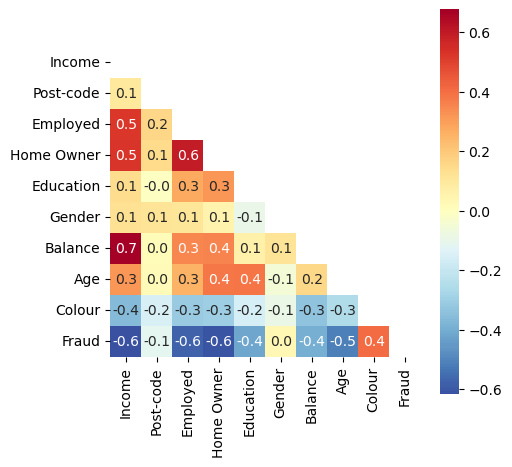

In [11]:
corr = df.corr()
unstack = corr.unstack()
print(unstack[unstack < 1][unstack > 0.5].sort_values(ascending=False))

# triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(5, 5))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.1f', square=True, cmap = 'RdYlBu_r')
plt.show()

In [12]:
features = df.drop('Fraud', axis=1, inplace=False).columns
print(features)

Index(['Income', 'Post-code', 'Employed', 'Home Owner', 'Education', 'Gender',
       'Balance', 'Age', 'Colour'],
      dtype='object')


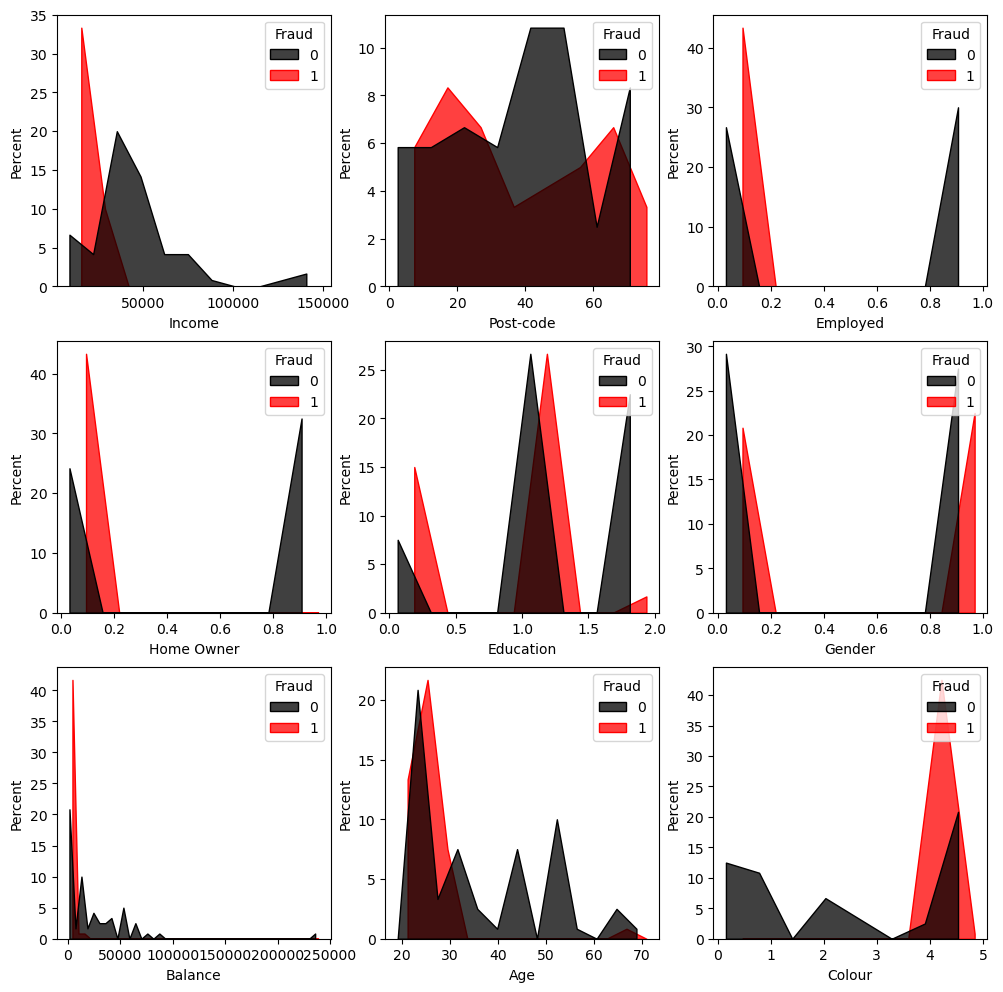

In [13]:
fig, axs = plt.subplots(figsize=(12,12) , ncols=3 , nrows=3)
for i , feature in enumerate(df.columns):
    if feature != 'Fraud':
        row = int(i/3)
        col = i%3
        sns.histplot(data=df, x=feature, hue="Fraud",
                     palette=['#000000', '#FF0000'], 
                     ax=axs[row][col],multiple='dodge', 
                     element='poly',stat='percent')
        # sns.regplot(x=feature , y='Fraud',data=df , ax=axs[row][col])
        # sns.barplot(data=df, x=feature, hue='Fraud', alpha=0.8, palette='YlGnBu', ax=axs[row][col])
        # sns.violinplot(x=feature, y ='Fraud', data=df, ax=axs[row][col])
#Income, Employed, Home Owner, Balance, Colour is over 30% related with Fraud

(79, 2)


<AxesSubplot:xlabel='Post-code', ylabel='mean_income'>

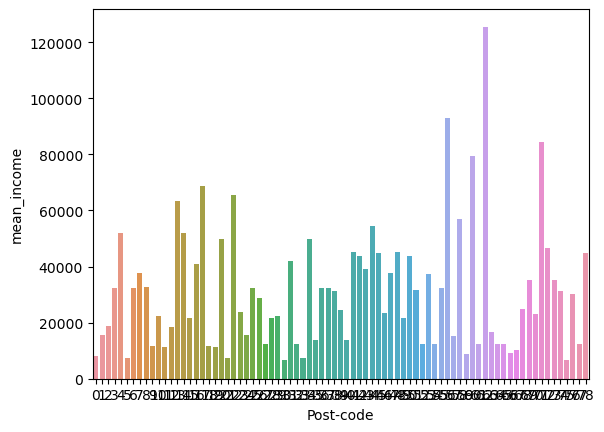

In [14]:
g = df.groupby('Post-code')['Income'].agg(**{'mean_income':'mean'}).reset_index()
print(g.shape)
sns.barplot(x='Post-code' , y='mean_income',data=g )

<AxesSubplot:xlabel='Income', ylabel='Post-code'>

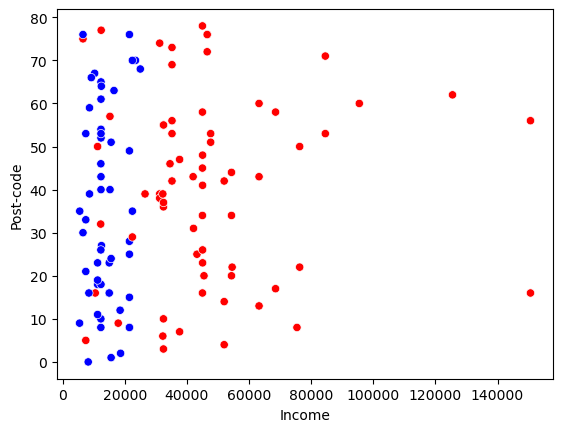

In [15]:
sns.scatterplot(x="Income", y="Post-code", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)



<AxesSubplot:xlabel='Income', ylabel='Age'>

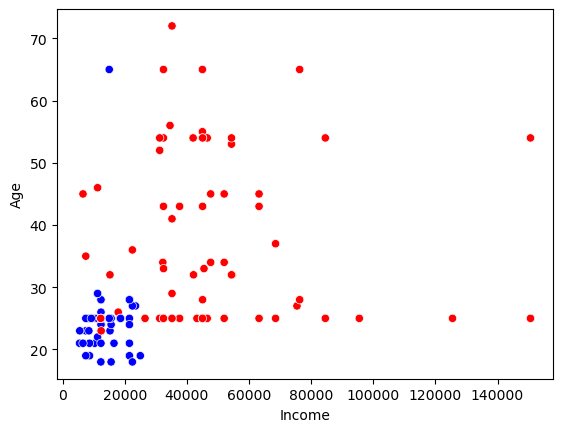

In [16]:
sns.scatterplot(x="Income", y="Age", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)


<AxesSubplot:xlabel='Income', ylabel='Education'>

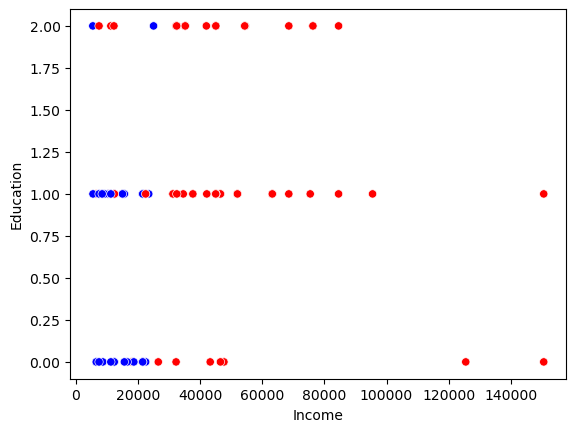

In [17]:
sns.scatterplot(x="Income", y="Education", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)


<AxesSubplot:xlabel='Income', ylabel='Gender'>

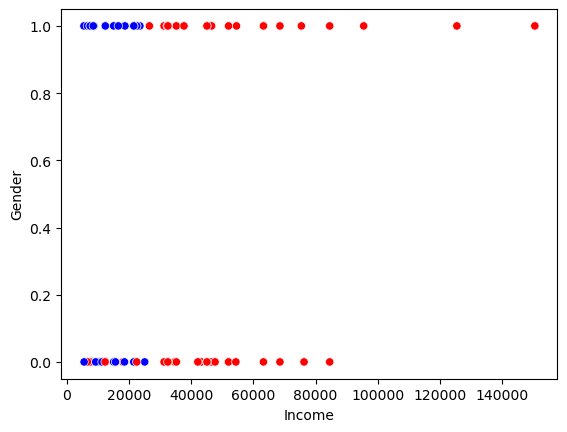

In [18]:
sns.scatterplot(x="Income", y="Gender", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)


<AxesSubplot:xlabel='Income', ylabel='Balance'>

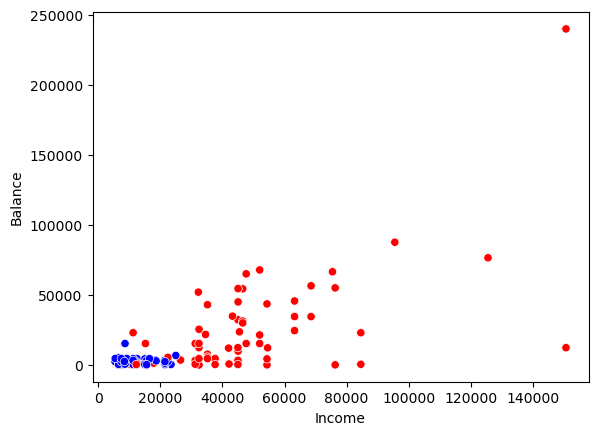

In [19]:
sns.scatterplot(x="Income", y="Balance", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)


<AxesSubplot:xlabel='Income', ylabel='Colour'>

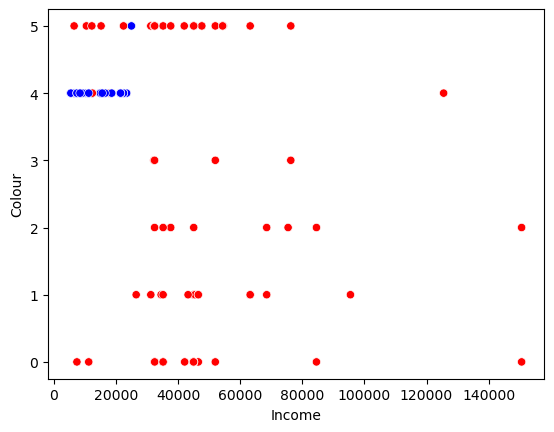

In [20]:
sns.scatterplot(x="Income", y="Colour", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)


<AxesSubplot:xlabel='Income', ylabel='Employed'>

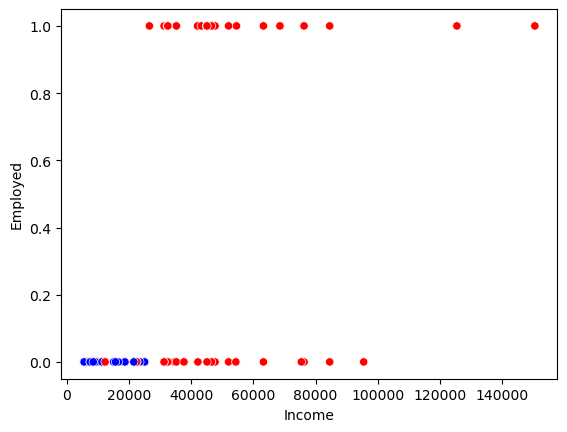

In [21]:
sns.scatterplot(x="Income", y="Employed", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)

<AxesSubplot:xlabel='Income', ylabel='Home Owner'>

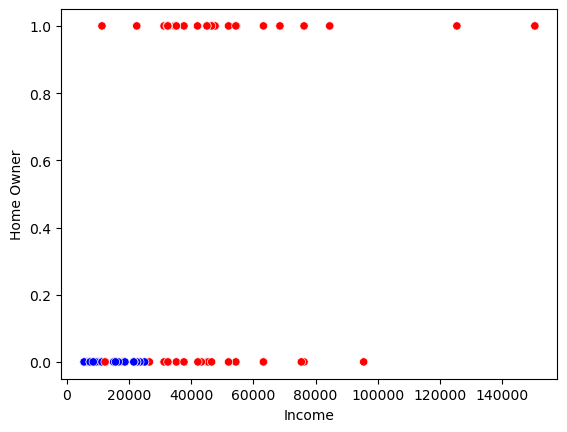

In [22]:
sns.scatterplot(x="Income", y="Home Owner", hue='Fraud', markers=["c", "a"], palette=['red', 'blue'], data=df, legend=False)
